# Imports and deck

In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000
DECKS = list(range(1, 15))
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

# Quick matcher

In [5]:
%%time

quick_deck_match(100_000, 2, accept_jokers=False)[3]
quick_deck_match(100_000, 3, accept_jokers=False)[3]
quick_deck_match(100_000, 7, accept_jokers=False)[3]


CPU times: user 3.55 s, sys: 17.3 ms, total: 3.57 s
Wall time: 3.57 s


99.902

In [6]:
%%time

df = quick_deck_matches_on(RUNS, decks=DECKS)
df

CPU times: user 307 ms, sys: 758 ms, total: 1.07 s
Wall time: 4min 9s


,Deck count,Results,Successes,N,Probability
0,1,0 -1 1 -1 2 -1 3 ...,3162138,5000000,63.24276
1,2,0 45 1 -1 2 23 3 ...,4323294,5000000,86.46588
2,3,0 12 1 -1 2 3 3 ...,4750403,5000000,95.00806
3,4,0 10 1 1 2 0 3 ...,4908123,5000000,98.16246
4,5,0 26 1 9 2 9 3 ...,4966408,5000000,99.32816
5,6,0 30 1 4 2 10 3 ...,4987704,5000000,99.75408
6,7,0 11 1 3 2 2 3 ...,4995564,5000000,99.91128
7,8,0 4 1 8 2 3 3 ...,4998254,5000000,99.96508
8,9,0 3 1 0 2 7 3 ...,4999439,5000000,99.98878
9,10,0 12 1 4 2 6 3 ...,4999753,5000000,99.99506


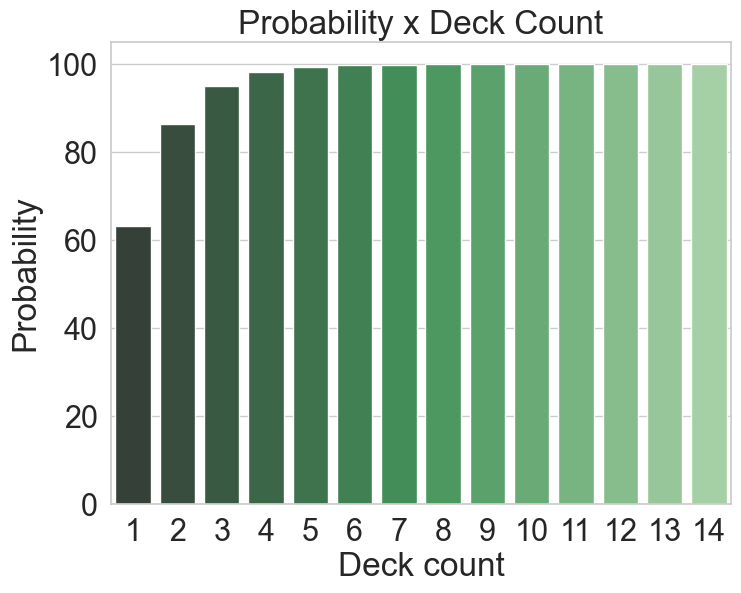

In [7]:
plot_all(df, "Probability")

In [8]:
with_red = palette[0].copy()
with_red[8] = (palette[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1400x800 with 0 Axes>

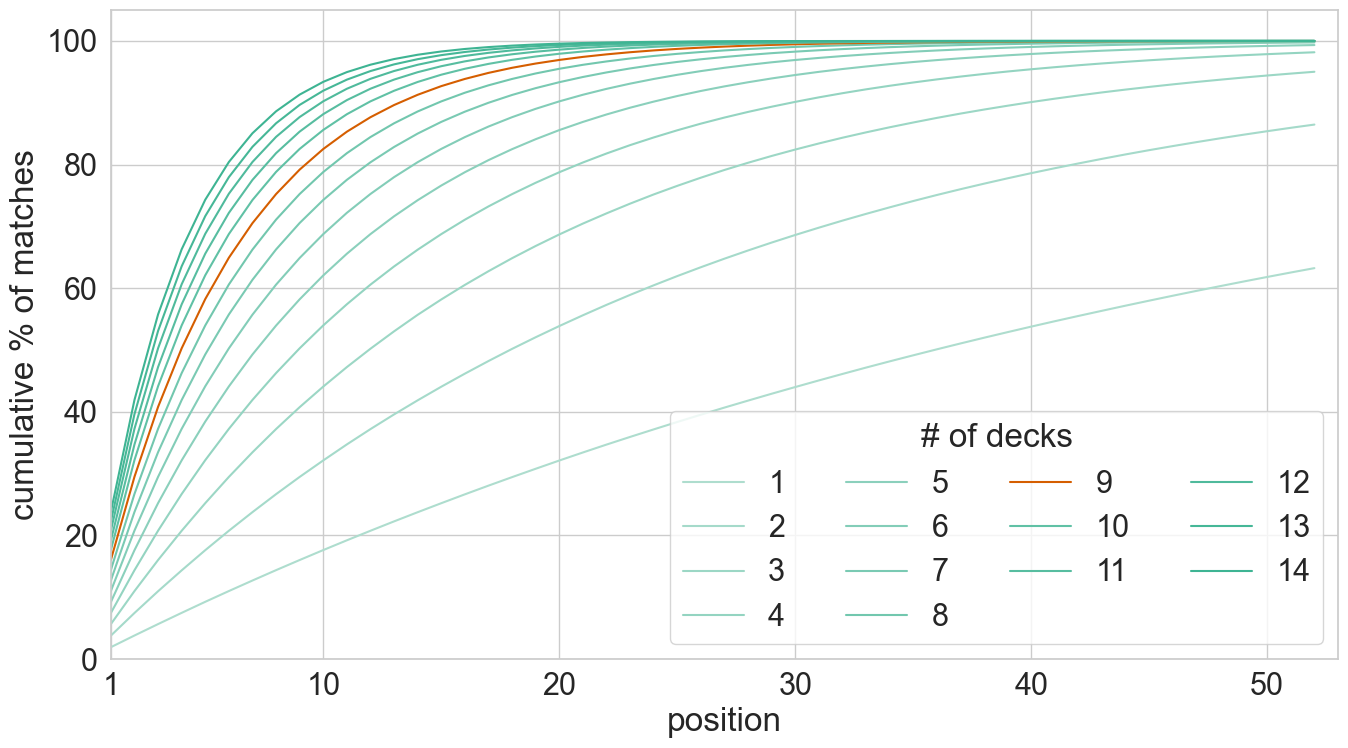

In [9]:
plt.figure(figsize=(14,8))
ax, data = print_cumulative(df, True, xticks=[1, 10, 20, 30, 40, 50], figsize=(14, 8), palette=with_red)

plt.legend(loc='lower right', ncol=4, title="# of decks")
plt.xlim(1, 53)
plt.ylim(0, 105)
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-bingo-miracle.eps", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1400x800 with 0 Axes>

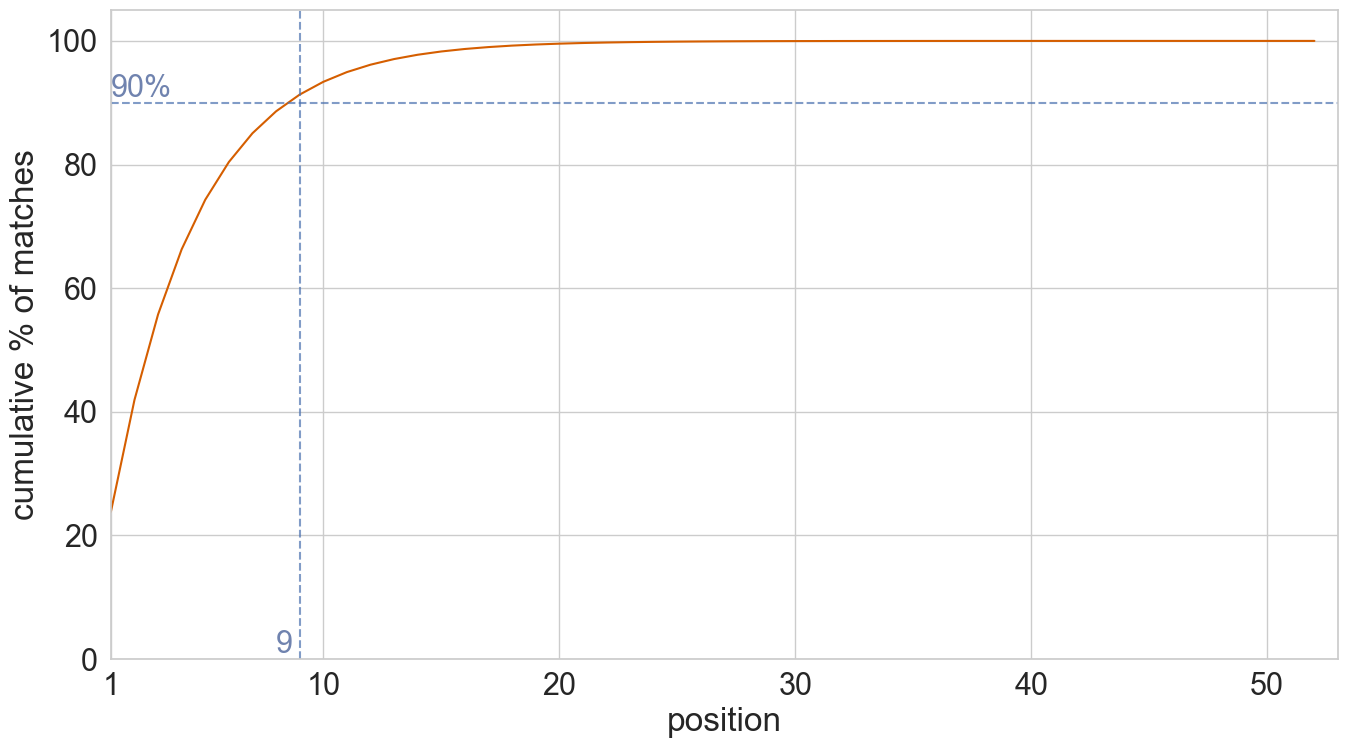

In [10]:
plt.figure(figsize=(14,8))
fourteen = df[df["Deck count"]==14]
ax, data = print_cumulative(fourteen, True, xticks=[1, 10, 20, 30, 40, 50], figsize=(14, 8), palette=[palette[1]])

ax.axhline(y=90, linestyle='dashed', alpha=0.7)
ax.text(y=91, x=1, s='90%', alpha=0.7, color='#334f8d', fontsize=22)

ax.axvline(x=9, linestyle='dashed', alpha=0.7)
ax.text(y=1, x=8, s='9', alpha=0.7, color='#334f8d', fontsize=22)

plt.xlim(1, 53)
plt.ylim(0, 105)
ax.get_legend().remove()
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-bingo-miracle-14.eps", dpi=300)
plt.show()

In [11]:

prob_table_to_latex(df, name="the-bingo-miracle")

\begin{table}[tb]
\label{tbl:the-bingo-miracle}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 63.243% & 63.200% & 63.285% \\
2 & 86.466% & 86.436% & 86.496% \\
3 & 95.008% & 94.989% & 95.027% \\
4 & 98.162% & 98.151% & 98.174% \\
5 & 99.328% & 99.321% & 99.335% \\
6 & 99.754% & 99.750% & 99.758% \\
7 & 99.911% & 99.909% & 99.914% \\
8 & 99.965% & 99.963% & 99.967% \\
9 & 99.989% & 99.988% & 99.990% \\
10 & 99.995% & 99.994% & 99.996% \\
11 & 99.998% & 99.998% & 99.998% \\
12 & 99.999% & 99.999% & 99.999% \\
13 & 100.000% & 100.000% & 100.000% \\
14 & 100.000% & 100.000% & 100.000% \\
\bottomrule
\end{tabular}
\end{table}

